<ul style="list-style: none;padding: 10px;font-size:20px;text-align:center;background: #0CA5B0;color:#f6f6f6;; border: 2px dashed #0CA5B0;border-radius:5px;">
    <li style="display: inline;">
        Ehsan Jahangirzadeh
    </li>
    <li style="display: inline;margin: 0 20px;">|</li>
    <li style="display: inline;">
        810194554
    </li>
    <li style="display: inline;margin: 0 20px;">|</li>
    <li style="display: inline;">
        CA#4
    </li>
    <li style="display: inline;margin: 0 20px;">|</li>
    <li style="display: inline;">
        Artificial Inteligence
    </li>
</ul>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from collections import Counter
from PIL import Image as Img
from IPython.display import Image, display
from pylab import *
import plotly.graph_objs as go
import plotly.offline as py
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<nav aria-label="breadcrumb">
  <ol class="breadcrumb" style="background:#605063;">
    <li class="breadcrumb-item" aria-current="page" style="color:#f6f6f6;">Add CIFAR train and test data</li>
  </ol>
</nav>

In [71]:
data_train=pd.read_csv('dataset/CIFAR10/CIFAR10_train_data.csv', header=None)
labels_train=pd.read_csv('dataset/CIFAR10/CIFAR10_train_label.csv', header=None)
data_train.head()

0     1     2     3     4     5     6     7     8     9     ...   3062  \
0    59    62    63    43    46    45    50    48    43    68  ...    104   
1   154   177   187   126   137   136   105   104    95   102  ...    136   
2   255   255   255   253   253   253   253   253   253   253  ...     79   
3    28    25    10    37    34    19    38    35    20    42  ...     38   
4   170   180   198   168   178   196   177   185   203   183  ...     78   

   3063  3064  3065  3066  3067  3068  3069  3070  3071  
0   216   184   140   151   118    84   123    92    72  
1   143   133   139   143   134   142   143   133   144  
2    78    85    83    79    85    83    80    86    84  
3    54    47    28    63    56    37    72    65    46  
4    75    79    82    71    75    78    73    77    80  

[5 rows x 3072 columns]

In [72]:
data_test=pd.read_csv('dataset/CIFAR10/CIFAR10_val_data.csv', header=None)
labels_test=pd.read_csv('dataset/CIFAR10/CIFAR10_val_label.csv', header=None)
data_test.head()

0     1     2     3     4     5     6     7     8     9     ...   3062  \
0   171   187   214   169   187   214   168   187   214   168  ...    145   
1   255   255   250   254   252   250   251   252   254   249  ...    254   
2   154   146   146   157   153   152   155   153   151   156  ...    138   
3    59    59    65    54    61    68    63    71    74    99  ...    119   
4   109   142   177   108   141   176   109   142   177   109  ...     34   

   3063  3064  3065  3066  3067  3068  3069  3070  3071  
0   111   133   147   110   132   146   111   133   147  
1   254   254   254   254   254   254   255   255   255  
2   131   131   131   115   115   115   111   111   111  
3   123   122   118   122   122   117   118   118   113  
4    46    39    42    45    42    38    46    41    39  

[5 rows x 3072 columns]

In [73]:
data_out=pd.read_csv('dataset/CIFAR10/CIFAR10_test_data.csv', header=None)
data_test.head()

0     1     2     3     4     5     6     7     8     9     ...   3062  \
0   171   187   214   169   187   214   168   187   214   168  ...    145   
1   255   255   250   254   252   250   251   252   254   249  ...    254   
2   154   146   146   157   153   152   155   153   151   156  ...    138   
3    59    59    65    54    61    68    63    71    74    99  ...    119   
4   109   142   177   108   141   176   109   142   177   109  ...     34   

   3063  3064  3065  3066  3067  3068  3069  3070  3071  
0   111   133   147   110   132   146   111   133   147  
1   254   254   254   254   254   254   255   255   255  
2   131   131   131   115   115   115   111   111   111  
3   123   122   118   122   122   117   118   118   113  
4    46    39    42    45    42    38    46    41    39  

[5 rows x 3072 columns]

In [74]:
X_train = data_train.values
y_train = labels_train.values.ravel()

X_test = data_test.values
y_test = labels_test.values.ravel()

X_out = data_out.values

<nav aria-label="breadcrumb">
  <ol class="breadcrumb" style="background:#605063;">
    <li class="breadcrumb-item" aria-current="page" style="color:#f6f6f6;">Turn the images to grayscale | PCA | Random projection | Augmentation</li>
  </ol>
</nav>

<div class="alert alert-success" role="alert">
  Turn the images to grayscale
</div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
<div align=right>
در این روش هدف تبدیل دیتای رنگی به یک دیتای سیاه و سفید است در نگاه اول این کار کار بی تاثیری به نظر می آید اما همین کار ساده به معنای حذف دو بعد از سه بعد از داده های ما می باشد که این خود به معنای یک Dimensionality Reduction اساسی می باشد همچنین این کاهش ابعاد داده در پیاده سازی بسیاری از الگوریتم ها به بهبود خروجی کمک میکند از آنجا که دیتای با corolation کم باعث نویز در خروجی می شود و در اکثر تصاویر با تشخیص لبه ها معمولا میتوان به خروجی نهایی و کلاس بندی مد نظر نیز رسید. روش های مختلفی برای این کار موجود است که در ادامه در چند عکس به آن ها اشاره شده.
<br />
<img src="images/2.png" alt="2" />
<img src="images/3.png" alt="3" />
<img src="images/1.png" alt="1" />
</div>
</font>
</div>

<div class="alert alert-success" role="alert">
  PCA
</div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
<div align=right>
یکی از کاربردهای اصلیِ PCA در عملیاتِ کاهشِ ویژگی(Dimensionality Reduction) است. PCA همان‌طور که از نامش پیداست می‌تواند مولفه‌های اصلی را شناسایی کند و به ما کمک می‌کند تا به جای اینکه تمامیِ ویژگی‌ها را مورد بررسی قرار دهیم، یک سری ویژگی‌هایی را ارزشِ بیشتری دارند، تحلیل کنیم. در واقع PCA آن ویژگی‌هایی را که ارزش بیشتری فراهم می‌کنند برای ما استخراج می‌کند
<br />
    PCA با توجه داده‌ها و دامنه‌ی تغییراتِ هر کدام از آن‌ها، می‌تواند ویژگی‌هایی را انتخاب کند که تاثیر حداکثری در نتیجه نهایی داشته‌ باشند.
<br />
در ادامه تصویری از نحوه عملکرد این الگوریتم آمده است:
<br />
<img src="images/source.gif" alt="PCA"/>
<button type="button" class="btn btn-lg btn-primary">
<a href="http://setosa.io/ev/principal-component-analysis/" style="text-decoration:none">
    دیتای اضافی
</a>
</button>
<button type="button" class="btn btn-lg btn-primary">
    <a href="https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60" style="text-decoration:none">
        منبع
    </a>
</button>
</div>
</font>
</div>

<div class="alert alert-success" role="alert">
  Random projection
</div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
<div align=right>
این الگوریتم به عنوان یک الگوریتم قدرتمند درDimensionality Reduction شناخته می شود. این الگوریتم معمولا در هر دو نوع دیتای noisy and noiseless data به کار می رود علی الخصوص در دیتای عکس و یا یا نوشته.نتیاج این پروجکشن بر روی random lower-dimensional subspace نتایجی مشابه PCA برای ما می سازد اما از نظر computationally less expensive. در این الگوریتم یک داده از higher dimension به lower-dimension پروجکت می شود به وسیله random matrix که ستون های آن به طول واحد می باشند. همچنین این الگوریتم به impulse noise حساس نیست لذا برای کاهش نویز قابل استفاده است. 
<br />
</div>
</font>
<a href="https://machinelearningmedium.com/2017/07/28/random-projection-in-dimensionality-reduction/" class="btn btn-lg btn-primary" style="text-decoration:none">منبع</a>
</div>

<div class="alert alert-success" role="alert">
  Augmentation
</div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
<div align=right>
Agumantation تکنیکی برای expand کردن سایز دیتاست به شکل مصنوعی می باشد که به این صورت عمل می کند که یک نسخه modified از تصویر را در دیتا ست می سازد.طبعا دیتای بیشتر به منزله مدل یادگیری شده ماهر تر است . این تکنیک یک transformed version از عکس می سازد این Transform ها چیز هایی مانند shifts, flips, zooms و غیره است.
<br />
<img src="images/bird.jpg" alt="bird" />
<img src="images/Plot-of-Augmented-Images-with-a-Horizontal-Shift.png" alt="bird" />
<a href="https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/" class="btn btn-lg btn-primary" style="text-decoration:none">منبع</a>
</div>
</font>
</div>

<div class="alert alert-danger" role="alert">
  First we try it without Feature Engineering | just a random forest
</div>

In [9]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

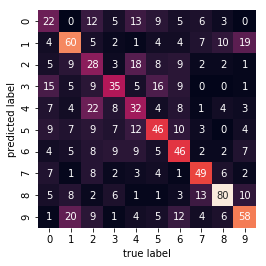

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

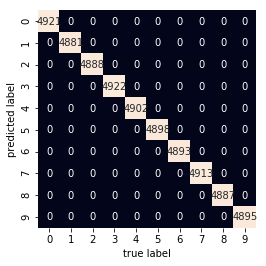

In [11]:
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on train data:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))

Accuracy on train data: 1.0
Accuracy on test data: 0.456


<div class="jumbotron" style="direction: rtl; border-radius: 10px; background: #56416C; color: #fff;">
    <font face="XB Zar" size=3>
    <p class="display" style="text-align: center; color: #FFF7C0;font-size: 4em;">45.6%</p>
    <br />
    <p class="lead" style="text-align: center">در پیاده سازی عادی بدون هیچ گونه تغییرخاصی در دیتای اولیه دقتی برابر با 45.6 گرفتیم.</p>
    </font>
</div>

In [26]:
# Predicting the Test set results
y_pred_out = classifier.predict(X_out)
y_pred_out = pd.DataFrame(y_pred_out)
y_pred_out.index.name = "id"
y_pred_out.columns = ["predict"]
y_pred_out
y_pred_out.to_csv("810194554.csv", sep='\t')

<nav aria-label="breadcrumb">
  <ol class="breadcrumb" style="background:#605063;">
    <li class="breadcrumb-item" aria-current="page" style="color:#f6f6f6;">Classification with feature engineering</li>
  </ol>
</nav>

In [8]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 350)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [9]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

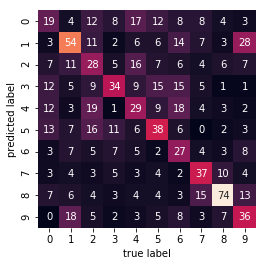

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

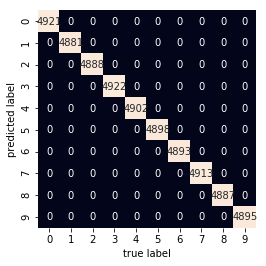

In [11]:
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on train data:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))

Accuracy on train data: 1.0
Accuracy on test data: 0.376


<nav aria-label="breadcrumb">
  <ol class="breadcrumb" style="background:#605063;">
    <li class="breadcrumb-item" aria-current="page" style="color:#f6f6f6;"></li>
  </ol>
</nav>

In [75]:
def make_nd_array(row):
    return np.reshape(np.array(row.tolist()), (32, 32, 3))

data_train['nd-array'] = data_train.apply(make_nd_array, axis=1)
data_train.head(10)

0    1    2    3    4    5    6    7    8    9  \
0   59   62   63   43   46   45   50   48   43   68   
1  154  177  187  126  137  136  105  104   95  102   
2  255  255  255  253  253  253  253  253  253  253   
3   28   25   10   37   34   19   38   35   20   42   
4  170  180  198  168  178  196  177  185  203  183   
5  159  102  101  150   91   95  153   95   97  154   
6  164  206   84  105  140   61  118  148  101  129   
7   28   35   39   30   34   44   33   44   47   62   
8  134  186  223  131  184  220  128  182  218  133   
9  125  125  116  110  101   91  102   90   83  106   

                         ...                          3063  3064  3065  3066  \
0                        ...                           216   184   140   151   
1                        ...                           143   133   139   143   
2                        ...                            78    85    83    79   
3                        ...                            54    47    28    63   
4                        ...                            75    79    82    71   
5                        ...                           166    47    14   173   
6                        ...                            94   134    29    91   
7                        ...                           106   144   100   104   
8                        ...                            31    94   136    32   
9                        ...                           143   117    82   143   

   3067  3068  3069  3070  3071  \
0   118    84   123    92    72   
1   134   142   143   133   144   
2    85    83    80    86    84   
3    56    37    72    65    46   
4    75    78    73    77    80   
5    51    17   182    57    19   
6   133    26   122   170    44   
7   142    99   101   140    96   
8    94   137    32    94   138   
9   116    84   144   116    86   

                                            nd-array  
0  [[[59, 62, 63], [43, 46, 45], [50, 48, 43], [6...  
1  [[[154, 177, 187], [126, 137, 136], [105, 104,...  
2  [[[255, 255, 255], [253, 253, 253], [253, 253,...  
3  [[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...  
4  [[[170, 180, 198], [168, 178, 196], [177, 185,...  
5  [[[159, 102, 101], [150, 91, 95], [153, 95, 97...  
6  [[[164, 206, 84], [105, 140, 61], [118, 148, 1...  
7  [[[28, 35, 39], [30, 34, 44], [33, 44, 47], [6...  
8  [[[134, 186, 223], [131, 184, 220], [128, 182,...  
9  [[[125, 125, 116], [110, 101, 91], [102, 90, 8...  

[10 rows x 3073 columns]

In [76]:
def gray_scale(data):
    rst = data[:, :, 0] + data[:, :, 1] + data[:, :, 2]
    rst = np.expand_dims(rst, axis=3)/3
    return rst.reshape(data.shape[0], -1)

data_train['nd-array-gray-scale'] = data_train.loc[:, "nd-array"].apply(gray_scale)
data_train.head(10)

0    1    2    3    4    5    6    7    8    9  \
0   59   62   63   43   46   45   50   48   43   68   
1  154  177  187  126  137  136  105  104   95  102   
2  255  255  255  253  253  253  253  253  253  253   
3   28   25   10   37   34   19   38   35   20   42   
4  170  180  198  168  178  196  177  185  203  183   
5  159  102  101  150   91   95  153   95   97  154   
6  164  206   84  105  140   61  118  148  101  129   
7   28   35   39   30   34   44   33   44   47   62   
8  134  186  223  131  184  220  128  182  218  133   
9  125  125  116  110  101   91  102   90   83  106   

                         ...                          3064  3065  3066  3067  \
0                        ...                           184   140   151   118   
1                        ...                           133   139   143   134   
2                        ...                            85    83    79    85   
3                        ...                            47    28    63    56   
4                        ...                            79    82    71    75   
5                        ...                            47    14   173    51   
6                        ...                           134    29    91   133   
7                        ...                           144   100   104   142   
8                        ...                            94   136    32    94   
9                        ...                           117    82   143   116   

   3068  3069  3070  3071                                           nd-array  \
0    84   123    92    72  [[[59, 62, 63], [43, 46, 45], [50, 48, 43], [6...   
1   142   143   133   144  [[[154, 177, 187], [126, 137, 136], [105, 104,...   
2    83    80    86    84  [[[255, 255, 255], [253, 253, 253], [253, 253,...   
3    37    72    65    46  [[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...   
4    78    73    77    80  [[[170, 180, 198], [168, 178, 196], [177, 185,...   
5    17   182    57    19  [[[159, 102, 101], [150, 91, 95], [153, 95, 97...   
6    26   122   170    44  [[[164, 206, 84], [105, 140, 61], [118, 148, 1...   
7    99   101   140    96  [[[28, 35, 39], [30, 34, 44], [33, 44, 47], [6...   
8   137    32    94   138  [[[134, 186, 223], [131, 184, 220], [128, 182,...   
9    84   144   116    86  [[[125, 125, 116], [110, 101, 91], [102, 90, 8...   

                                 nd-array-gray-scale  
0  [[61.333333333333336, 44.666666666666664, 47.0...  
1  [[172.66666666666666, 133.0, 101.3333333333333...  
2  [[255.0, 253.0, 253.0, 253.0, 253.0, 253.0, 25...  
3  [[21.0, 30.0, 31.0, 34.0, 36.0, 33.0, 33.66666...  
4  [[182.66666666666666, 180.66666666666666, 188....  
5  [[120.66666666666667, 112.0, 115.0, 133.333333...  
6  [[151.33333333333334, 102.0, 122.3333333333333...  
7  [[34.0, 36.0, 41.333333333333336, 72.333333333...  
8  [[181.0, 178.33333333333334, 176.0, 177.666666...  
9  [[122.0, 100.66666666666667, 91.66666666666667...  

[10 rows x 3074 columns]

In [77]:
def make_nd_array(row):
    return np.reshape(np.array(row.tolist()), (32, 32, 3))

data_test['nd-array'] = data_test.apply(make_nd_array, axis=1)
data_test.head(10)

0    1    2    3    4    5    6    7    8    9  \
0  171  187  214  169  187  214  168  187  214  168   
1  255  255  250  254  252  250  251  252  254  249   
2  154  146  146  157  153  152  155  153  151  156   
3   59   59   65   54   61   68   63   71   74   99   
4  109  142  177  108  141  176  109  142  177  109   
5   67   52   32   71   57   33   78   64   42   83   
6    8   42  106    9   43  106   12   46  110   13   
7  182  196  192  102  141  158   95  143  174   96   
8  137  144  126  143  147  130  146  148  132  150   
9  241  233  219  245  237  224  252  246  232  254   

                         ...                          3063  3064  3065  3066  \
0                        ...                           111   133   147   110   
1                        ...                           254   254   254   254   
2                        ...                           131   131   131   115   
3                        ...                           123   122   118   122   
4                        ...                            46    39    42    45   
5                        ...                           129   124   104   112   
6                        ...                           135   145   187   132   
7                        ...                            83   119   140    82   
8                        ...                           166   167   175   155   
9                        ...                            76    58    51    80   

   3067  3068  3069  3070  3071  \
0   132   146   111   133   147   
1   254   254   255   255   255   
2   115   115   111   111   111   
3   122   117   118   118   113   
4    42    38    46    41    39   
5   113    97    91   101    89   
6   143   184   130   140   182   
7   115   126   140   157   148   
8   150   133   172   178   172   
9    62    56    80    61    57   

                                            nd-array  
0  [[[171, 187, 214], [169, 187, 214], [168, 187,...  
1  [[[255, 255, 250], [254, 252, 250], [251, 252,...  
2  [[[154, 146, 146], [157, 153, 152], [155, 153,...  
3  [[[59, 59, 65], [54, 61, 68], [63, 71, 74], [9...  
4  [[[109, 142, 177], [108, 141, 176], [109, 142,...  
5  [[[67, 52, 32], [71, 57, 33], [78, 64, 42], [8...  
6  [[[8, 42, 106], [9, 43, 106], [12, 46, 110], [...  
7  [[[182, 196, 192], [102, 141, 158], [95, 143, ...  
8  [[[137, 144, 126], [143, 147, 130], [146, 148,...  
9  [[[241, 233, 219], [245, 237, 224], [252, 246,...  

[10 rows x 3073 columns]

In [78]:
def gray_scale(data):
    rst = data[:, :, 0] + data[:, :, 1] + data[:, :, 2]
    rst = np.expand_dims(rst, axis=3)/3
    return rst.reshape(data.shape[0], -1)

data_test['nd-array-gray-scale'] = data_test.loc[:, "nd-array"].apply(gray_scale)
data_test.head(10)

0    1    2    3    4    5    6    7    8    9  \
0  171  187  214  169  187  214  168  187  214  168   
1  255  255  250  254  252  250  251  252  254  249   
2  154  146  146  157  153  152  155  153  151  156   
3   59   59   65   54   61   68   63   71   74   99   
4  109  142  177  108  141  176  109  142  177  109   
5   67   52   32   71   57   33   78   64   42   83   
6    8   42  106    9   43  106   12   46  110   13   
7  182  196  192  102  141  158   95  143  174   96   
8  137  144  126  143  147  130  146  148  132  150   
9  241  233  219  245  237  224  252  246  232  254   

                         ...                          3064  3065  3066  3067  \
0                        ...                           133   147   110   132   
1                        ...                           254   254   254   254   
2                        ...                           131   131   115   115   
3                        ...                           122   118   122   122   
4                        ...                            39    42    45    42   
5                        ...                           124   104   112   113   
6                        ...                           145   187   132   143   
7                        ...                           119   140    82   115   
8                        ...                           167   175   155   150   
9                        ...                            58    51    80    62   

   3068  3069  3070  3071                                           nd-array  \
0   146   111   133   147  [[[171, 187, 214], [169, 187, 214], [168, 187,...   
1   254   255   255   255  [[[255, 255, 250], [254, 252, 250], [251, 252,...   
2   115   111   111   111  [[[154, 146, 146], [157, 153, 152], [155, 153,...   
3   117   118   118   113  [[[59, 59, 65], [54, 61, 68], [63, 71, 74], [9...   
4    38    46    41    39  [[[109, 142, 177], [108, 141, 176], [109, 142,...   
5    97    91   101    89  [[[67, 52, 32], [71, 57, 33], [78, 64, 42], [8...   
6   184   130   140   182  [[[8, 42, 106], [9, 43, 106], [12, 46, 110], [...   
7   126   140   157   148  [[[182, 196, 192], [102, 141, 158], [95, 143, ...   
8   133   172   178   172  [[[137, 144, 126], [143, 147, 130], [146, 148,...   
9    56    80    61    57  [[[241, 233, 219], [245, 237, 224], [252, 246,...   

                                 nd-array-gray-scale  
0  [[190.66666666666666, 190.0, 189.6666666666666...  
1  [[253.33333333333334, 252.0, 252.3333333333333...  
2  [[148.66666666666666, 154.0, 153.0, 155.333333...  
3  [[61.0, 61.0, 69.33333333333333, 100.666666666...  
4  [[142.66666666666666, 141.66666666666666, 142....  
5  [[50.333333333333336, 53.666666666666664, 61.3...  
6  [[52.0, 52.666666666666664, 56.0, 59.0, 63.0, ...  
7  [[190.0, 133.66666666666666, 137.3333333333333...  
8  [[135.66666666666666, 140.0, 142.0, 145.333333...  
9  [[231.0, 235.33333333333334, 243.3333333333333...  

[10 rows x 3074 columns]

In [79]:
l = []
for i in range(len(data_train)):
    l.append(data_train.loc[:, 'nd-array-gray-scale'].values[i].flatten())
l

[array([ 61.33333333,  44.66666667,  47.        , ..., 180.        ,
        117.66666667,  95.66666667]),
 array([172.66666667, 133.        , 101.33333333, ..., 138.33333333,
        139.66666667, 140.        ]),
 array([255.        , 253.        , 253.        , ...,  82.        ,
         82.33333333,  83.33333333]),
 array([21., 30., 31., ..., 43., 52., 61.]),
 array([182.66666667, 180.66666667, 188.33333333, ...,  78.66666667,
         74.66666667,  76.66666667]),
 array([120.66666667, 112.        , 115.        , ...,  75.66666667,
         80.33333333,  86.        ]),
 array([151.33333333, 102.        , 122.33333333, ...,  85.66666667,
         83.33333333, 112.        ]),
 array([ 34.        ,  36.        ,  41.33333333, ..., 116.66666667,
        115.        , 112.33333333]),
 array([181.        , 178.33333333, 176.        , ...,  87.        ,
         87.66666667,  88.        ]),
 array([122.        , 100.66666667,  91.66666667, ..., 114.        ,
        114.33333333, 115.3333

In [88]:
l2 = []
for i in range(len(data_test)):
    l2.append(data_test.loc[:, 'nd-array-gray-scale'].values[i].flatten())
l2

[array([190.66666667, 190.        , 189.66666667, ..., 130.33333333,
        129.33333333, 130.33333333]),
 array([253.33333333, 252.        , 252.33333333, ..., 254.        ,
        254.        , 255.        ]),
 array([148.66666667, 154.        , 153.        , ..., 131.        ,
        115.        , 111.        ]),
 array([ 61.        ,  61.        ,  69.33333333, ..., 121.        ,
        120.33333333, 116.33333333]),
 array([142.66666667, 141.66666667, 142.66666667, ...,  42.33333333,
         41.66666667,  42.        ]),
 array([ 50.33333333,  53.66666667,  61.33333333, ..., 119.        ,
        107.33333333,  93.66666667]),
 array([ 52.        ,  52.66666667,  56.        , ..., 155.66666667,
        153.        , 150.66666667]),
 array([190.        , 133.66666667, 137.33333333, ..., 114.        ,
        107.66666667, 148.33333333]),
 array([135.66666667, 140.        , 142.        , ..., 169.33333333,
        146.        , 174.        ]),
 array([231.        , 235.33333333, 2

In [84]:
from numpy import array
a = array( l )

In [89]:
from numpy import array
a2 = array( l2 )

In [85]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
classifier.fit(a, y_train)

# Predicting the Test set results
y_pred_train = classifier.predict(a)

In [91]:
y_pred = classifier.predict(a2)

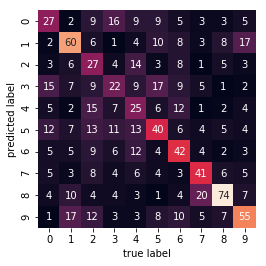

In [92]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

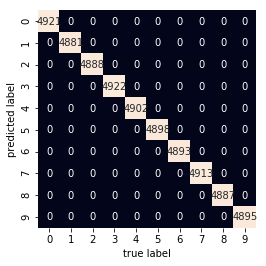

In [86]:
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [93]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on train data:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))

Accuracy on train data: 1.0
Accuracy on test data: 0.413
